In [1]:
import sys
sys.path.append("/home/pmitrano/catkin_ws/src/video_prediction/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from video_prediction.datasets import base_dataset 
from video_prediction.datasets import softmotion_dataset
from video_prediction.datasets import unity_cloth_dataset
import json

np.set_printoptions(suppress=True, precision=4, linewidth=250)

In [3]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
sess= tf.Session(config=config)

In [7]:
# input_dir = "/home/pmitrano/catkin_ws/src/video_prediction/data/bair"
# dataset_hparams_dict = json.load(open("/home/pmitrano/catkin_ws/src/video_prediction/pretrained_models/bair/ours_savp/dataset_hparams.json", 'r'))
# dataset_hparams = 'sequence_length=30'
# input_dir = "/home/pmitrano/catkin_ws/src/link_bot/link_bot_data/data/moving_block/"
input_dir = "/home/pmitrano/catkin_ws/src/link_bot/link_bot_data/data/unity_cloth_long_test/"
dataset_hparams_dict = json.load(open("/home/pmitrano/catkin_ws/src/video_prediction/hparams/unity_cloth/dataset_hparams.json", 'r'))
dataset_hparams = 'sequence_length=120'
dataset = unity_cloth_dataset.UnityClothDataset(input_dir, mode="test", seed=0, num_epochs=1, hparams_dict=dataset_hparams_dict, hparams=dataset_hparams)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [8]:
inputs = dataset.make_batch(8)

Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.


In [9]:
list(inputs.keys())

['images', 'states', 'actions']

In [10]:
outputs = sess.run(inputs)

In [11]:
image0 = outputs['images'][0]
state0 = outputs['states'][0]
u0 = outputs['actions'][0]

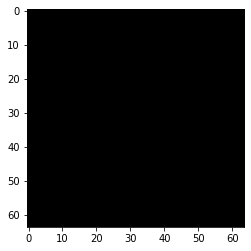

In [14]:
plt.imshow(image0[1])

In [ ]:
print(u0)
plt.figure()
plt.plot(u0[:, 0:2])
plt.figure()
plt.plot(u0[:, 2:4])
;

In [ ]:
print(state0)
plt.plot(state0);

In [ ]:
plt.plot(state0[:, 0], state0[:, 1]);
plt.axis("equal")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(state0[:,0], state0[:,1], state0[:,2])
plt.show()